In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import itertools

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
affiliations = pd.read_csv("SC-List.csv")

In [3]:
affiliations.head()

,First Name,Last Name,Email,Telephone,Company,Contact Category,Role
0,Alexandra,Abate,abate@email.arizona.edu,NaN,University of Arizona,DESC,Member
1,Alexandra,Abate,abate@email.arizona.edu,NaN,University of Arizona,Weak Lensing,Affiliate
2,Ghaleb,Abdulla,abdulla1@llnl.gov,925-423-5947,Lawrence Livermore National Laboratory,Transients,Member
3,Paul Alexander,Abell,paul.a.abell@nasa.gov,281-483-0293,NASA Johnson Space Center,Solar System,Member
4,Eric,Agol,agol@astro.washington.edu,NaN,University of Washington,Strong Lensing,Affiliate


In [4]:
affiliations.describe()

,First Name,Last Name,Email,Telephone,Company,Contact Category,Role
count,1061,1060,1060,546,95,1060,1060
unique,534,769,812,360,58,17,2
top,Michael,Ivezic,ivezic@astro.washington.edu,206-543-9487,University of Washington,Transients,Member
freq,32,11,11,12,8,201,931


In [5]:
affiliations.drop_duplicates(inplace=True)
affiliations.describe()

,First Name,Last Name,Email,Telephone,Company,Contact Category,Role
count,1032,1031,1031,527,93,1031,1031
unique,534,769,812,360,58,17,2
top,Michael,Jones,ljones.uw@gmail.com,206-543-9487,University of Washington,Transients,Member
freq,31,10,10,12,8,188,918


In [6]:
(affiliations["Contact Category"] == 'DESC').sum()

92

In [7]:
affiliations.dropna(subset=["Contact Category"], inplace=True)
affiliations.describe()

,First Name,Last Name,Email,Telephone,Company,Contact Category,Role
count,1031,1031,1031,527,93,1031,1031
unique,533,769,812,360,58,17,2
top,Michael,Jones,ljones.uw@gmail.com,206-543-9487,University of Washington,Transients,Member
freq,31,10,10,12,8,188,918


In [8]:
affiliations["Contact Category"] =\
    affiliations["Contact Category"].apply(lambda x:x.strip())

In [9]:
affiliations.ix[affiliations["Contact Category"] == 'Stars', "Contact Category"] = 'Stars, Milky Way, and Local Volume'
affiliations.ix[affiliations["Contact Category"] == 
             'Milky Way and Local Volume', "Contact Category"] = 'Stars, Milky Way, and Local Volume'

In [10]:
affiliations = affiliations[~(
        (affiliations["Contact Category"] == 'Weak Lensing') | 
             (affiliations["Contact Category"] == 'Supernovae'))]
affiliations.describe()

,First Name,Last Name,Email,Telephone,Company,Contact Category,Role
count,912,912,912,465,78,912,912
unique,493,695,736,323,53,8,2
top,Michael,Strauss,strauss@astro.princeton.edu,206-543-9487,University of Washington,"Stars, Milky Way, and Local Volume",Member
freq,29,9,9,10,8,254,814


In [11]:
for em in affiliations.Email.unique()[:1]:
    print (em) 
    print (affiliations[affiliations.Email == em]["Contact Category"])

abate@email.arizona.edu
0    DESC
Name: Contact Category, dtype: object


In [12]:
scmatrix = np.zeros((affiliations["Contact Category"].unique().shape[0],
                     affiliations["Contact Category"].unique().shape[0]))
scmatrix.shape

(8, 8)

In [13]:
affiliations["Contact Category"].unique()

array(['DESC', 'Transients', 'Solar System', 'Strong Lensing',
       'Stars, Milky Way, and Local Volume', 'Statistics and Informatics',
       'AGN', 'Galaxies'], dtype=object)

In [14]:
scdic = {}
for i,sc in enumerate(affiliations["Contact Category"].unique()):
    scdic[sc] = i
    scmatrix[i,i] = len(affiliations[affiliations["Contact Category"] == 
                                     sc])

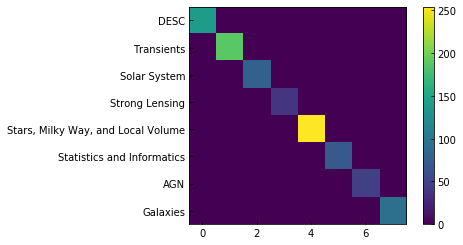

In [15]:
fig = pl.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(scmatrix)
ax.set_yticks(range(8))
ax.set_yticklabels(["%s"%s for s in affiliations["Contact Category"].unique()])#affiliations["Contact Category"].unique()
fig.colorbar(cax);

In [16]:
for sc in affiliations["Contact Category"].unique():
    print(affiliations[affiliations["Contact Category"] == sc].Email)

0                 abate@email.arizona.edu
8                       galdering@lbl.gov
12                       swa@stanford.edu
13      david.alonso@physics.oxford.ac.uk
22              Pierre.Antilogus@in2p3.fr
36                       eric@aubourg.net
38                  avestruz@uchicago.edu
48                balmaverde@oato.inaf.it
60                          barth@uci.edu
61            bartlett@apc.univ-paris7.fr
66                   mbaumer@stanford.edu
70            becker@astro.washington.edu
71                  beckermr@stanford.edu
73            becker@astro.washington.edu
75                       beers@pa.msu.edu
77                     ericbell@umich.edu
93                     blanc@lal.in2p3.fr
96                      blazek.35@osu.edu
100                  dennis@astro.umd.edu
103                         heb11@psu.edu
115            jbosch@astro.princeton.edu
124                    niel@astro.psu.edu
130             christopher.britt@ttu.edu
133                         sb@aao

In [17]:
for em in affiliations["Email"].unique():
    affhere = affiliations[affiliations["Email"] == em]
    if(affhere.shape[0] > 1):
        print(em)
        for pair in itertools.combinations(affhere["Contact Category"].values, 
                                      2):
            scmatrix[scdic[pair[0]], scdic[pair[1]]] += 1
            scmatrix[scdic[pair[1]], scdic[pair[0]]] = scmatrix[scdic[pair[0]], scdic[pair[1]]]

agol@astro.washington.edu
marcel@astro.columbia.edu
javier.alonso@uantof.cl
anderson@astro.washington.edu
tanguita@gmail.com
babu@psu.edu
djbard@slac.stanford.edu
bartlett@apc.univ-paris7.fr
rbean@astro.cornell.edu
becker@astro.washington.edu
garyb@physics.upenn.edu
fbianco@nyu.edu
blanc@lal.in2p3.fr
bongard@lpnhe.in2p3.fr
sbonito@astropa.unipa.it
kirk.borne@gmail.com
jbosch@astro.princeton.edu
niel@astro.psu.edu
bigdog@illinois.edu
burchat@stanford.edu
mcatelan@astro.puc.cl
chartasg@cofc.edu
chernoff@astro.cornell.edu
echeu@email.arizona.edu
ciardi@ipac.caltech.edu
cinabro@physics.wayne.edu
cclaver@lsst.org
ajc@astro.washington.edu
kcook@noao.edu
acooray@uci.edu
kevin.covey@wwu.edu
cui@purdue.edu
scottvalscott@gmail.com
digel@slac.stanford.edu
cdfassnacht@ucdavis.edu
edf@astro.psu.edu
ferguson@roe.ac.uk
giuliana.fiorentino@oabo.inaf.it
frieman@fnal.gov
brendafrye@gmail.com
gawiser@physics.rutgers.edu
dkg@slac.stanford.edu
dgold@berkeley.edu
habib@anl.gov
zoltan@astro.columbia.edu
slha

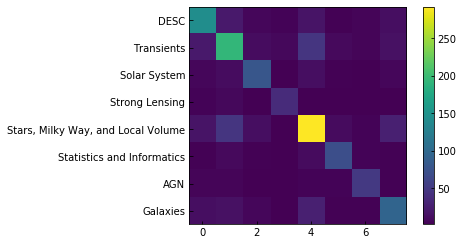

In [18]:
fig = pl.figure()
ax = fig.add_subplot(111)
cax = ax.imshow(scmatrix)
ax.set_yticks(range(8))
ax.set_yticklabels(["%s"%s for s in affiliations["Contact Category"].unique()])#affiliations["Contact Category"].unique()
fig.colorbar(cax);

In [28]:
foutaff = open("data/affiliations.csv", "w")
foutnums = open("data/affiliationsNumbers.csv", "w")
foutnums.write("subg,tot\n")
foutaff.write("word1,word2,count\n")
for i,sc1 in enumerate(scdic.keys()):
    for sc2 in scdic.keys():
        if sc1 == sc2:
            foutaff.write('"' + sc1 + '","' + sc1 +'",0\n')
            foutnums.write(sc1 + ',%d\n'%int(scmatrix[scdic[sc1], scdic[sc1]]))
        else:
            foutaff.write('"' + sc1 + '","' + sc2 +'",%d\n'%int(scmatrix[scdic[sc1], scdic[sc2]]))
foutnums.write("totalaff,%d\n"%len(affiliations))
foutnums.write("totalmem,%d\n"%len(affiliations["Email"].unique()))

In [29]:
foutaff.close()
foutnums.close()